In [1]:
import pandas as pd

import pmdarima as pm
from pmdarima.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib as plt

from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt

plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
TRIM_COEFF = 0.75

df_init = pd.read_csv('4362249.csv')

df_dated = df_init.set_index('DateTime') 

<AxesSubplot:xlabel='DateTime'>

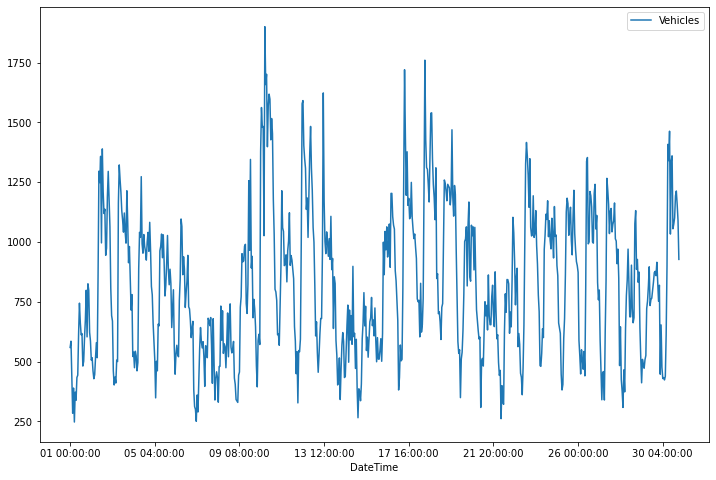

In [3]:
df_dated.plot()

In [4]:
TRAIN_RATIO = 0.8

train_serie, test_serie = train_test_split(df_dated.Vehicles, train_size = int(df_dated.shape[0] * TRAIN_RATIO))

In [5]:
model = pm.auto_arima(train_serie[300:], seasonal=True, m = 24)
print('p, d, q: ' + str(model.get_params()['order']))
print('Ps, d, Qs, m: ' + str(model.get_params()['seasonal_order']))

p, d, q: (1, 0, 1)
Ps, d, Qs, m: (1, 0, 1, 24)


In [6]:
test_predict_df = pd.DataFrame(model.predict(test_serie.shape[0]), index = test_serie.index)

0.5229741895355288
195.54600166977363
161.1310768252673


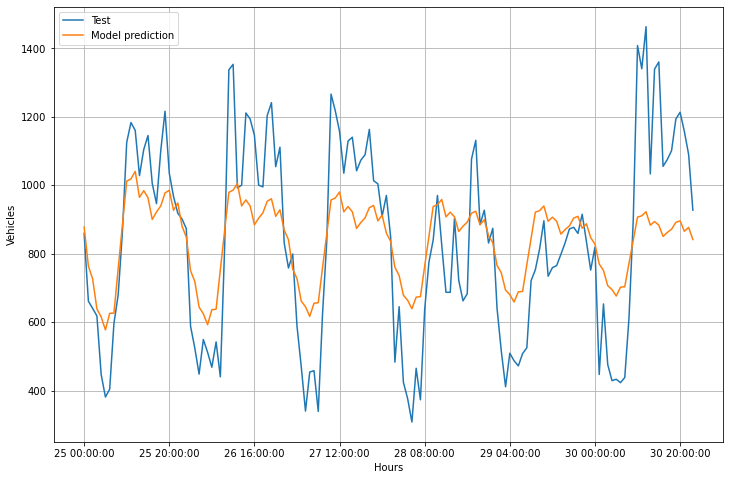

In [7]:
ax = test_serie.plot()
test_predict_df.plot(ax = ax)
ax.legend(['Test', 'Model prediction'])
ax.grid('on')
ax.set_label('SARIMA test-predicted comparasion')
ax.set_ylabel('Vehicles')
ax.set_xlabel('Hours')

print(r2_score(test_serie, test_predict_df))
print(mean_squared_error(test_serie, test_predict_df, squared=False))
print(mean_absolute_error(test_serie, test_predict_df))